In [1]:
# Mengekstrak Data Set
# 1. Upload File DataSet.zip ke Direktori
from zipfile import ZipFile, BadZipFile
import os # Import os module to check file existence

file_name = "/content/drive/MyDrive/pola/archive (1).zip"

# Check if the file exists before attempting to open it
if os.path.exists(file_name):
    try:
        with ZipFile(file_name, 'r') as zip:
          zip.extractall()
        print('Done')
    except BadZipFile:
        print(f"Error: The file '{file_name}' is not a valid zip file or is corrupted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print(f"Error: The file '{file_name}' was not found at the specified path.")

Done


00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG
07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL 5399.JPG
882798ca-67c3-45a3-86cf-4aed69388145___RS_HL 1750.JPG
5a3fc4bb-a78c-4276-8934-f0b037ffb860___RS_HL 5412.JPG
2dee1571-ef6b-40ef-8c46-334e89aad3f1___RS_HL 1950.JPG
43fd6ace-3712-494a-9aba-de5482d22561___RS_HL 1968.JPG
9d7d1bb9-1b10-4a8f-a961-e404b9d5acf8___RS_HL 1960.JPG
2e0b8b4b-e900-408b-b760-730690bbd382___RS_HL 1901.JPG
f30983c0-6e20-43cc-8672-4622ca34c830___RS_HL 1949.JPG
71c06efe-089f-49b3-beed-095bd7640e32___RS_HL 1947.JPG
1ae826e2-5148-47bd-a44c-711ec9cc9c75___RS_HL 1954.JPG
2ccb9ee9-faac-4d32-9af5-29497fa2e028___RS_HL 1837.JPG
20ac28d6-5708-4e31-8676-1b1979de094f___RS_HL 1735.JPG
799b10e8-ba67-4e08-9abe-748789572ad1___RS_HL 1881.JPG
1106c3fc-92cb-41a6-a6c6-8f08b9b45108___RS_HL 1914.JPG
5df30492-0b54-474d-8883-bba9474ca88f___RS_HL 1801.JPG
8b2ce6b6-f00a-4f25-ac6d-4249dd7dc5f6___RS_HL 1890.JPG
b35b9f8b-daca-4d12-a5be-defe68d0acc5___RS_HL 1903.JPG
4ae82355-6885-40e7-9807-dabe

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     3,276,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,920,087 (37.84 MB)

 Trainable params: 3,306,695 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,613,392 (25.23 MB)

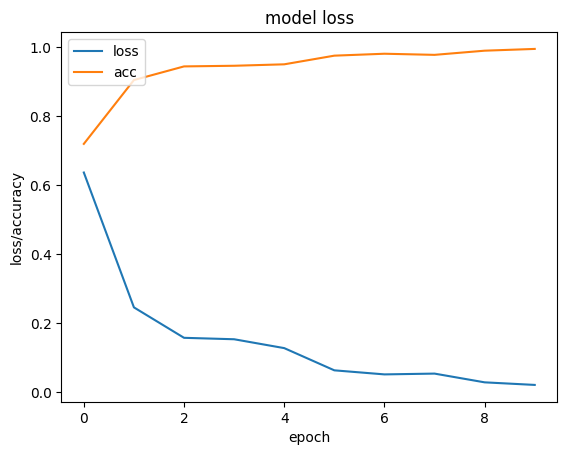

In [2]:
import os
from keras.models import load_model
import cv2
import numpy as np
from keras.layers import Input, Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

def LoadCitraTraining(sDir,LabelKelas):
  JumlahKelas=len(LabelKelas)
  TargetKelas = np.eye(JumlahKelas)
# Menyiapkan variabel list untuk data menampung citra dan data target
  X=[]#Menampung Data Citra
  T=[]#Menampung Target
  for i in range(len(LabelKelas)):
    #Membaca file citra di setiap direktori data set
    DirKelas = os.path.join(sDir, LabelKelas[i])
    files = os.listdir(DirKelas)

    for f in files:
      ff=f.lower()
      print(f)
      #memilih citra dengan extensi jpg,jpeg,dan png
      if (ff.endswith('.jpg')|ff.endswith('.jpeg')|ff.endswith('.png')):
         NmFile = os.path.join(DirKelas,f)
         #membaca citra berwarna sebagai data bertipe double
         img= np.double(cv2.imread(NmFile,1))
         img=cv2.resize(img,(128,128));
         #Normalisasi data citra menjadi sehingga maksimum menjadi 1
         img= np.asarray(img)/255;
         img=img.astype('float32')
         #Menambahkan citra dan target ke daftar
         X.append(img)
         T.append(TargetKelas[i])
     #--------akhir loop :Pfor f in files-----------------
  #-----akhir  loop :for i in range(len(LabelKelas))----

  #Mengubah List Menjadi numppy array
  X=np.array(X)
  T=np.array(T)
  X=X.astype('float32')
  T=T.astype('float32')
  return X,T

def ModelDeepLearningCNN(JumlahKelas):
    input_img = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(100,activation='relu')(x)
    x = Dense(100,activation='relu')(x)
    x=Dense(JumlahKelas,activation='softmax')(x)
    ModelCNN = Model(input_img, x)
    ModelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #ModelCNN.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return ModelCNN

def TrainingCNN(JumlahEpoh,DirektoriDataSet,LabelKelas,NamaFileBobot ='weight.h5' ):
    #Membaca Data training dan label Kelas
    X,D=LoadCitraTraining(DirektoriDataSet,LabelKelas)
    JumlahKelas = len(LabelKelas)
    #Membuat Model CNN
    ModelCNN =ModelDeepLearningCNN(JumlahKelas)
    #Trainng
    history=ModelCNN.fit(X, D,epochs=JumlahEpoh,shuffle=True)
    #Menyimpan hasil learning
    ModelCNN.save(NamaFileBobot)
    #Mengembalikan output
    return ModelCNN,history


##########################################################
def Klasifikasi(DirDataSet,DirKlasifikasi,LabelKelas,ModelCNN=[]):
#Apabila parameter input ModelCNN tidak di isi maka
#   akan menggunakan bobot pada file 'weight.h5
  if not(ModelCNN):
      ModelCNN = load_model('weight.h5')

#Menyiapkan Data input Yang akan di kasifikasikan
  X=[]
  ls = [];
  DirKelas = DirDataSet+"\\"+DirKlasifikasi
  print(DirKelas)
  files = os.listdir(DirKelas)
  n=0;
  for f in files:
      ff=f.lower()
      print(f)
      if (ff.endswith('.jpg')|ff.endswith('.jpeg')|ff.endswith('.png')):
         ls.append(ff)
         NmFile = os.path.join(DirKelas,f)
         img= cv2.imread(NmFile,1)
         img=cv2.resize(img,(128,128))
         img= np.asarray(img)/255
         img=img.astype('float32')
         X.append(img)
     #----Akhir if-------------
  #---Akhir For
  X=np.array(X)
  X=X.astype('float32')
  #Melakukan prediksi Klasifikasi
  hs=ModelCNN.predict(X)

  LKlasifikasi=[];
  LKelasCitra =[];
  n = X.shape[0]
  for i in range(n):
      v=hs[i,:]
      if v.max()>0.5:
          idx = np.max(np.where( v == v.max()))
          LKelasCitra.append(LabelKelas[idx])
      else:
          idx=-1
          LKelasCitra.append("-")
      #------akhir if
      LKlasifikasi.append(idx);
  #----akhir for
  LKlasifikasi = np.array(LKlasifikasi)
  return ls, hs, LKelasCitra

#****************
#  Program Utama
#****************

###############################################
#  1, Training CNN
#----------------------------------------------
#a. Menentukan Direktori Yang menyimpan Data set
DirektoriDataSet="/content/PlantVillage"
#   Data Set disimpan dalam direktori yang sama dengan nama kelas

#b. Label Data Set
LabelKelas=("Potato___healthy", "Potato___Late_blight", "Potato___Early_blight")

#c. Inisialisasi parameter Training
JumlahEpoh = 10;
FileBobot = "PlantVillage_weight.h5"
#d. training
ModelCNN,history = TrainingCNN(JumlahEpoh,DirektoriDataSet,LabelKelas ,FileBobot)
ModelCNN.summary()

#c. Menampilkan Grafik Loss dan accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.title('model loss')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'acc'], loc='upper left')
plt.show()


Kelas: Potato___healthy


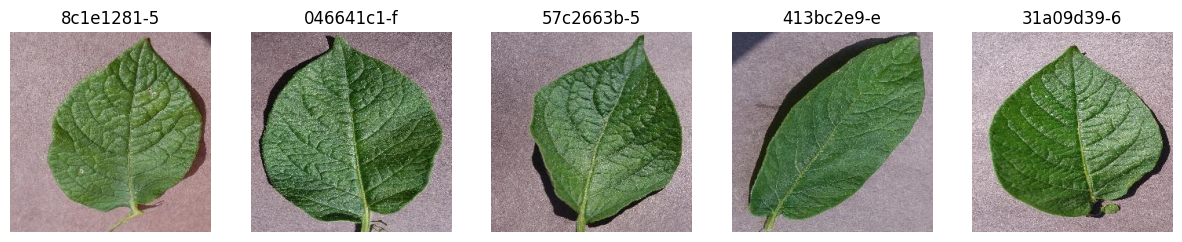


Kelas: Potato___Late_blight


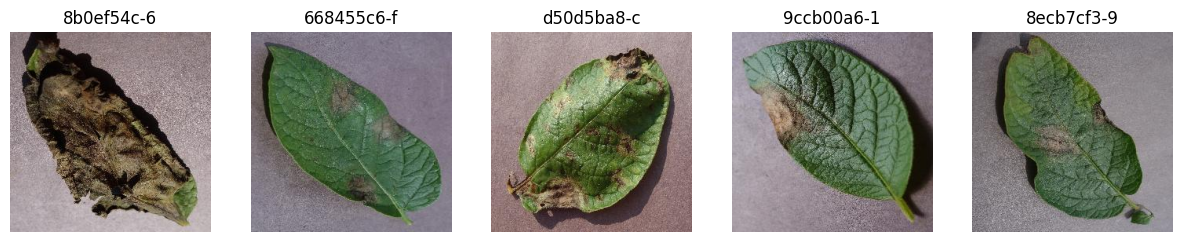


Kelas: Potato___Early_blight


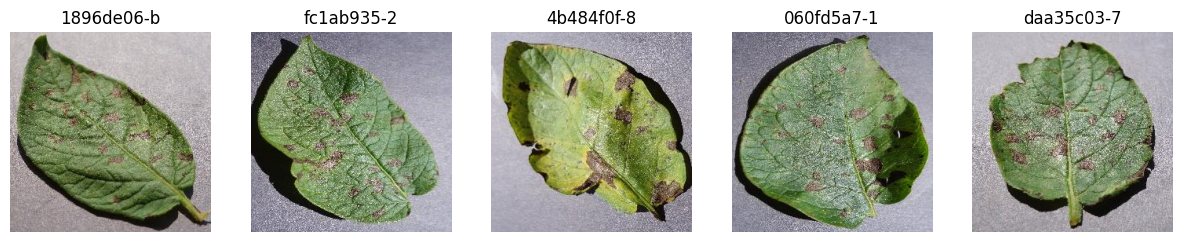

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Path ke dataset
base_dir = "/content/PlantVillage"
label_kelas = ["Potato___healthy", "Potato___Late_blight", "Potato___Early_blight"]

# Menampilkan 5 gambar dari setiap kelas
for kelas in label_kelas:
    folder_path = os.path.join(base_dir, kelas)
    all_images = os.listdir(folder_path)
    sample_images = random.sample(all_images, 5)  # ambil 5 gambar acak

    print(f"\nKelas: {kelas}")
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(folder_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(img_name[:10])
        plt.axis('off')
    plt.show()


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load model CNN (pastikan file 'PlantVillage_weight.h5' sudah ada)
# Mengubah nama file dari 'weight.h5' menjadi 'PlantVillage_weight.h5'
ModelCNN = load_model('PlantVillage_weight.h5')

# Label kelas sesuai output model saat training
LabelKelas = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

# Upload gambar uji
uploaded = files.upload()

for fn in uploaded.keys():
    # Load dan tampilkan gambar
    path = fn
    img = image.load_img(path, target_size=(128, 128))  # ukuran harus sesuai dengan input model
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Pra-pemrosesan gambar
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # normalisasi

    # Prediksi
    classes = ModelCNN.predict(x)
    pred_idx = np.argmax(classes[0])         # ambil indeks kelas tertinggi
    pred_label = LabelKelas[pred_idx]        # ambil label dari indeks
    confidence = np.max(classes[0]) * 100    # persen kepercayaan

    # Output hasil prediksi
    print(f"{fn} => Prediksi: {pred_label} ({confidence:.2f}%)")

In [ ]:
!pip install anvil-uplink

In [ ]:
import anvil.server

In [ ]:
anvil.server.connect("server_WLXTFDRILDNUEWMAHC7NJHMR-U7RVA2Q33N5QUOOH")

In [ ]:
import anvil.server
import anvil.media
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Load model CNN (pastikan file 'PlantVillage_weight.h5' sudah ada)
# Mengubah nama file dari 'weight.h5' menjadi 'PlantVillage_weight.h5'
# Fix: Changed the model file name from 'WRambu.h5' to 'PlantVillage_weight.h5'
ModelCNN = load_model('PlantVillage_weight.h5')

# Label kelas sesuai urutan output model
LabelKelas = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as f:
        img = load_img(f, target_size=(128, 128))  # Sesuaikan jika model pakai ukuran lain
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        prediction = ModelCNN.predict(img_array)
        pred_index = np.argmax(prediction[0])
        pred_label = LabelKelas[pred_index]

        return pred_label

In [ ]:
anvil.server.wait_forever()